In [1]:
#import dependencies 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read csv
df = pd.read_csv('Raw_Data/data_arrhythmia.csv',delimiter = ';')
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [3]:
#Pull variables of interest
new_df = df[['age','sex','height','weight','qrs_duration','p-r_interval','q-t_interval','t_interval','p_interval','qrs','heart_rate','diagnosis']]
new_df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,63,8
1,56,1,165,64,81,174,401,149,39,25,53,6
2,54,0,172,95,138,163,386,185,102,96,75,10
3,55,0,175,94,100,202,380,179,143,28,71,1
4,75,0,190,80,88,181,360,177,103,-16,?,7


In [4]:
#Find any null variables
new_df.isnull().sum()

age             0
sex             0
height          0
weight          0
qrs_duration    0
p-r_interval    0
q-t_interval    0
t_interval      0
p_interval      0
qrs             0
heart_rate      0
diagnosis       0
dtype: int64

In [5]:
#Arrhythmia = 1
new_df['diagnosis'].value_counts()

1     245
10     50
2      44
6      25
16     22
4      15
3      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: diagnosis, dtype: int64

In [6]:
# number of heart arrhythmias not of interest
sum(df['diagnosis']!=15)

447

In [7]:
# Number of Arrhythmia of interest
sum(df['diagnosis']==15)

5

In [8]:
#Set arrhythmia of interest = 1
dummy_df = new_df.join(pd.get_dummies(new_df['diagnosis']==15))
dummy_df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,False,True
0,75,0,190,80,91,193,371,174,121,-16,63,8,1,0
1,56,1,165,64,81,174,401,149,39,25,53,6,1,0
2,54,0,172,95,138,163,386,185,102,96,75,10,1,0
3,55,0,175,94,100,202,380,179,143,28,71,1,1,0
4,75,0,190,80,88,181,360,177,103,-16,?,7,1,0


In [9]:
#drop false column
dummy_df.drop(columns=[False],axis=1,inplace=True)
dummy_df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,True
0,75,0,190,80,91,193,371,174,121,-16,63,8,0
1,56,1,165,64,81,174,401,149,39,25,53,6,0
2,54,0,172,95,138,163,386,185,102,96,75,10,0
3,55,0,175,94,100,202,380,179,143,28,71,1,0
4,75,0,190,80,88,181,360,177,103,-16,?,7,0


In [10]:
#Rename True column to Arrhythmia diagnosis
dummy_df.rename(columns={True:'arr_diagnosis'},inplace=True)

In [11]:
dummy_df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,arr_diagnosis
0,75,0,190,80,91,193,371,174,121,-16,63,8,0
1,56,1,165,64,81,174,401,149,39,25,53,6,0
2,54,0,172,95,138,163,386,185,102,96,75,10,0
3,55,0,175,94,100,202,380,179,143,28,71,1,0
4,75,0,190,80,88,181,360,177,103,-16,?,7,0


In [12]:
#heart_rate column had string '?', this will remove the string
replaced = dummy_df.replace(['?'],0)

In [13]:
replaced.dtypes

age               int64
sex               int64
height            int64
weight            int64
qrs_duration      int64
p-r_interval      int64
q-t_interval      int64
t_interval        int64
p_interval        int64
qrs               int64
heart_rate       object
diagnosis         int64
arr_diagnosis     int64
dtype: object

In [14]:
#change all columns to integer
replaced_df = replaced.astype(int)
replaced_df.dtypes

age              int32
sex              int32
height           int32
weight           int32
qrs_duration     int32
p-r_interval     int32
q-t_interval     int32
t_interval       int32
p_interval       int32
qrs              int32
heart_rate       int32
diagnosis        int32
arr_diagnosis    int32
dtype: object

# age

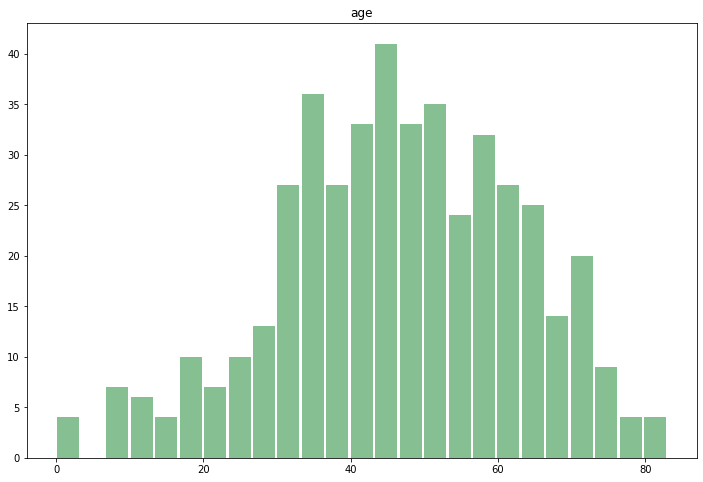

In [15]:
#Distribution of age
ax = replaced_df.hist(column='age', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
plt.savefig('age histogram 1.png')

In [16]:
plt.savefig('age histogram.png')

<Figure size 432x288 with 0 Axes>

In [17]:
bins = [0,10,20,30,40,50,60,70,85]
group_bins = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-85']

In [18]:
replaced_df['binned'] = pd.cut(replaced_df['age'], bins, labels = group_bins)

In [19]:
bins_age = replaced_df['binned'].value_counts()

In [20]:
ages_hyp = pd.DataFrame({'Age_count':bins_age})

In [22]:
 ages_hyp.sort_values(by=['Age_count'], ascending=False)

,Age_count
40-49,107
30-39,95
50-59,83
60-69,67
20-29,34
70-85,32
10-19,23
0-9,10


# Weight

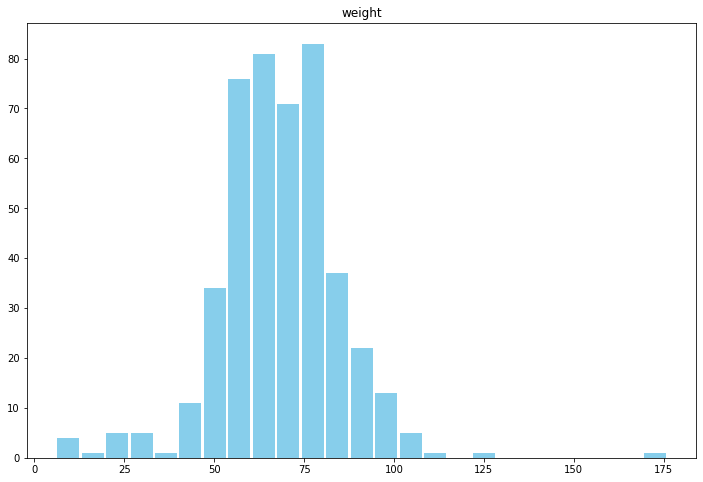

In [120]:
#Distribution of weight
ax = replaced_df.hist(column='weight', bins=25, grid=False, figsize=(12,8), color = "skyblue", zorder=2, rwidth=0.9 )
plt.savefig('weight histogram.png')

In [77]:
replaced_df['weight'].min()

6

In [78]:
replaced_df['weight'].max()

176

In [81]:
w_bins = [0,25,50,75,100,125,150,200]

In [82]:
group_w = ['0-24','25-49','50-74','75-99','100-124','125-149','150-200']

In [84]:
replaced_df['weight_binned'] = pd.cut(replaced_df['weight'], w_bins, labels = group_w)

In [86]:
bins_weight = replaced_df['weight_binned'].value_counts()

In [87]:
weight_hyp = pd.DataFrame({'Weight':bins_weight})

In [88]:
weight_hyp

,Weight
50-74,279
75-99,126
25-49,29
0-24,10
100-124,7
150-200,1
125-149,0


# Gender

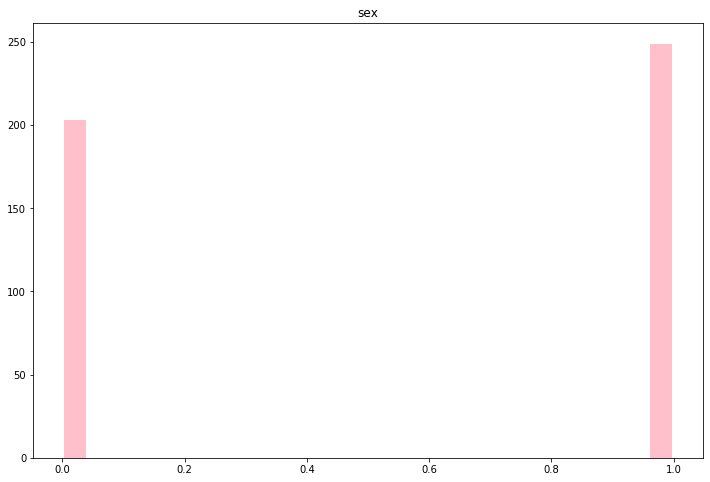

In [121]:
#Distribution of Sex
#Male = 0
#Female = 1
ax = replaced_df.hist(column='sex', bins=25, grid=False, figsize=(12,8), color='pink', zorder=2, rwidth=0.9)
plt.savefig('Gender histogram.png')

In [129]:
gender_v = replaced_df['sex'].value_counts()
gender_v

1    249
0    203
Name: sex, dtype: int64

In [130]:
gender_hyp = pd.DataFrame({'Gender_count':gender_v})

In [137]:
gender_hyp['Gender']=({'Male','Females'})

In [138]:
gender_hyp.set_index(['Gender'])

,Gender_count
Gender,
Females,249
Male,203


In [124]:
gender_hyp

,Gender_count,Gender
1,249,Male
0,203,Female


# Heart Rate

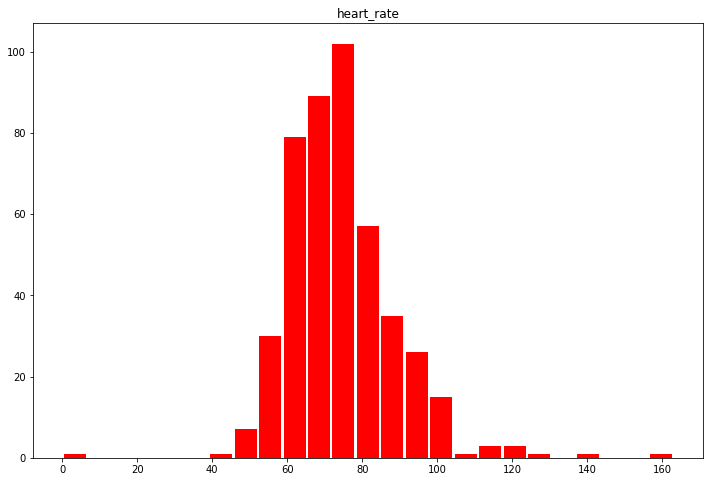

In [139]:
#Distribution of heart rate
ax = replaced_df.hist(column='heart_rate', bins=25, grid=False, figsize=(12,8), color='red', zorder=2, rwidth=0.9)
plt.savefig('Heart histogram.png')

In [141]:
replaced_df['heart_rate'].min()

0

In [142]:
replaced_df['heart_rate'].max()

163

In [143]:
heart_bins = [0,20,40,60,80,100,120,140,160]

In [144]:
group_heart = ['0-19','20-39','40-69','70-79','80-99','100-119','120-139','140-160']

In [145]:
replaced_df['heart_binned'] = pd.cut(replaced_df['heart_rate'], heart_bins, labels = group_heart)

In [146]:
bins_heart_w = replaced_df['heart_binned'].value_counts()

In [148]:
heart_hyp = pd.DataFrame({'Heart_rate_bin':bins_heart_w})

In [149]:
heart_hyp 

,Heart_rate_bin
70-79,278
80-99,102
40-69,52
100-119,14
120-139,4
140-160,0
20-39,0
0-19,0


In [ ]:
import seaborn as sns

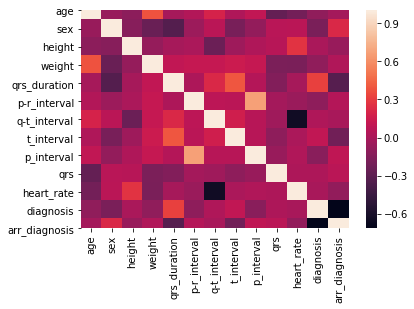

In [23]:
sns.heatmap(replaced_df.corr())

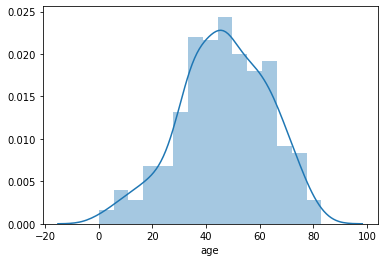

In [24]:
sns.distplot(replaced_df['age'])